In [17]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'

# Problem Parameters
a = 0
b = 1


def exact(*x):
    return np.prod(np.cos(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2 + 1) * exact(*x)

In [18]:
# Parameters
d = 2
k = 2
delta = 0.3
N = 3

# Computed Parameters
ranges = ((a, b),) * d
xc = rad.gridn(ranges, N, flat=True)

# Integration
integrator = rad.integrate.MeanIntegrator(ranges, 250)
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Solve for approximate solution
phi = rad.Wendland(d, k, delta, xc)
solver = rad.solve.GalerkinSolver(phi, integrator, 'helmholtz')
approx = solver.solve(f)
error = rad.error(exact, approx, error_integrator)

print("L2 Relative Error:", error)
# print("Condition Number:", solver.cond())

L2 Relative Error: 0.3731865647873444


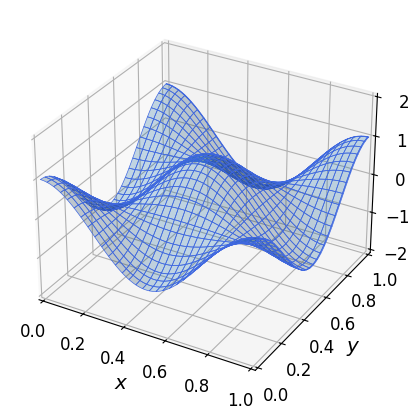

In [19]:
x, y = rad.gridn(ranges, 250)
exact_val = exact(x, y)


fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(projection='3d')
ax.plot_surface(x, y, exact_val, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.25)
ax.set_zlim((-2., 2.))
ax.margins(x=0., y=0.)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.savefig("figures/galerkin/exact.pdf")

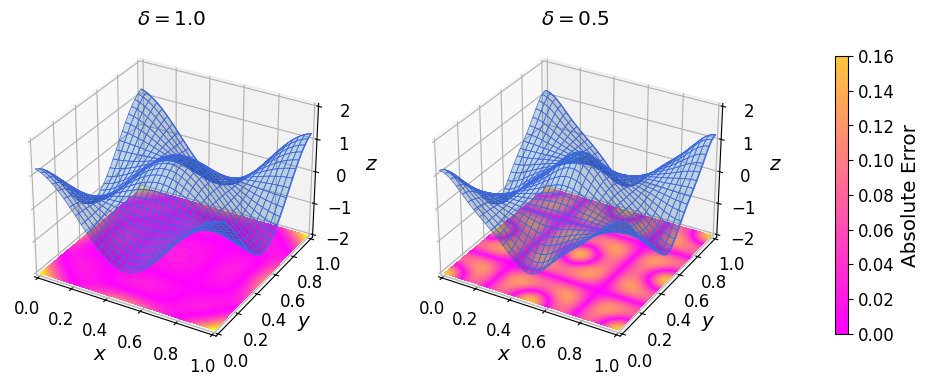

In [20]:
deltas = [1., 0.5]

fig, axs = plt.subplots(1, 2, figsize=(10, 4.5), subplot_kw={'projection': '3d'})

approx_vals = np.array([rad.solve.GalerkinSolver(rad.Wendland(d, k, delta, xc), integrator, 'helmholtz').solve(f)(x, y) for delta in deltas])
errors = np.array([np.abs(approx_val - exact_val) for approx_val in approx_vals])
max_error = np.max(errors)

im = None
for i, (ax, delta, approx_val, error) in enumerate(zip(axs.flat, deltas, approx_vals, errors)):
    surf = ax.plot_surface(x, y, approx_val, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.25)
    im = ax.contourf(x, y, error, 50, vmin=0., vmax=max_error, offset=-2., zdir='z', cmap='spring')
    ax.set_zlim((-2., 2.))
    ax.margins(x=-0.1, y=-0.1)
    ax.set_title(f"$\\delta = {delta}$")
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.25)
cbar = plt.colorbar(im, ax=axs.ravel().tolist(), shrink=0.7, pad=0.1)
cbar.set_label("Absolute Error")
plt.savefig("figures/galerkin/results.pdf", bbox_inches='tight', pad_inches=0.5)